# About
<blockquote>The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.</blockquote>

# BigMart Sales Prediction problem
We have two type of data :
- Train data (8523),that has both input and output variable(s).
- Test data  (5681).

## Types of data
1. Item_Identifier: Unique ID

2. Item_Weight: Weight of product

3. Item_Fat_Content: Whether the product is low fat or not

4. Item_Visibility: The % of total display area of all products in a store allocated to the particular product

5. Item_Type: The category of the product

6. Item_MRP: Maximum Retail Price  of the product

7. Outlet_Identifier: Unique store ID

8. Outlet_Establishment_Year: The year in which store was established

9. Outlet_Size: The size of the store in terms of ground area covered

10. Outlet_Location_Type: The type of city in which the store is located

11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

12. Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted

## Hypothesis generation 
hypothesis depends on understanding the problem and looking at the data as many factors can affect the output,hypothesis can be done in different levels.
- store level: marketing, location and competitors.
- Product level: brand and packaging
- Customer level: family income, family member ages and their jobs.
- Macro level :in environent and the whole economics

### Import Required libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Reading Data 

In [142]:
#Import Library Pandas
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [143]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### Structur o the data 

In [144]:
# shape of the data
train.shape, test.shape

((8523, 12), (5681, 11))

In [145]:
# view the data type and info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [146]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [147]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [148]:
# check for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [149]:
# check for duplicated values
sum(train.duplicated())

0

### Treatment of missing value 
- Item weight
- outlet Size

In [150]:

missing_data = ['Item_Weight', 'Outlet_Size']
for i in missing_data:
    fill_list = train[i].dropna().tolist()
    train[i] = train[i].fillna(pd.Series(np.random.choice(fill_list , size = len(train.index))))
    


In [151]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Calculate some statistics for the train data

In [152]:
train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].mean()

Item_Weight                    12.853221
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [153]:
train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].median()

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [154]:
train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].std()

Item_Weight                     4.630864
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

### Correction of fat content data

In [155]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [156]:
train.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [157]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### EDA
- Univariate
- Bivariate


<AxesSubplot:xlabel='Item_Outlet_Sales'>

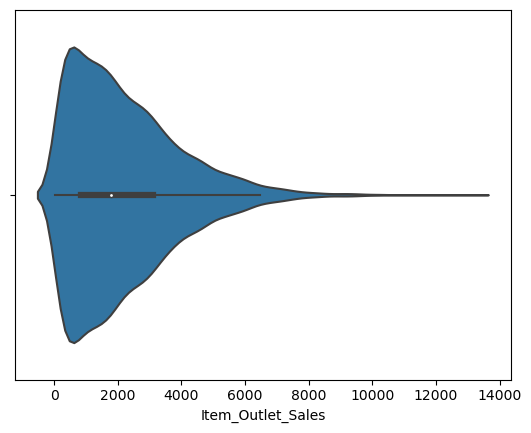

In [158]:
sns.violinplot(x=train["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Visibility'>

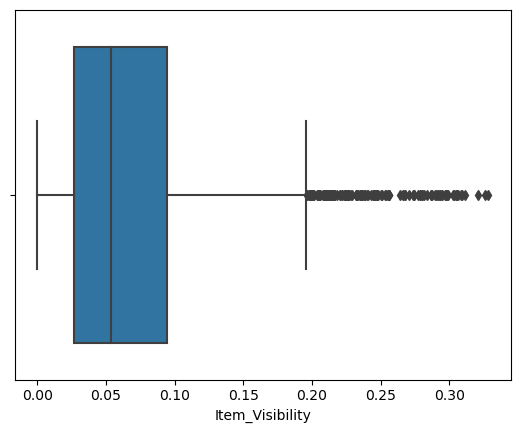

In [159]:
sns.boxplot(x=train["Item_Visibility"])

<AxesSubplot:xlabel='Item_MRP'>

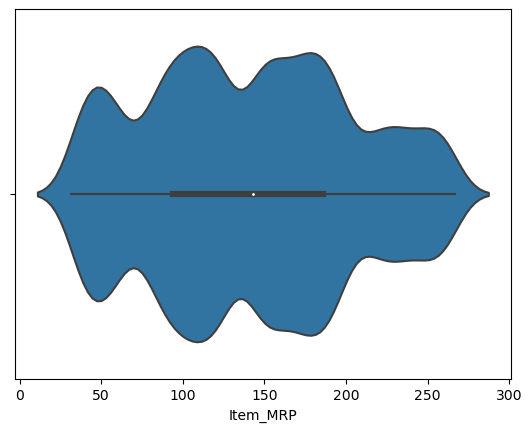

In [160]:
sns.violinplot(x=train["Item_MRP"])

<AxesSubplot:>

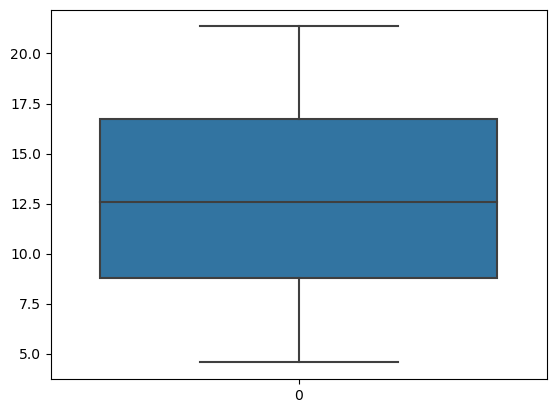

In [161]:
sns.boxplot(data=train['Item_Weight'])

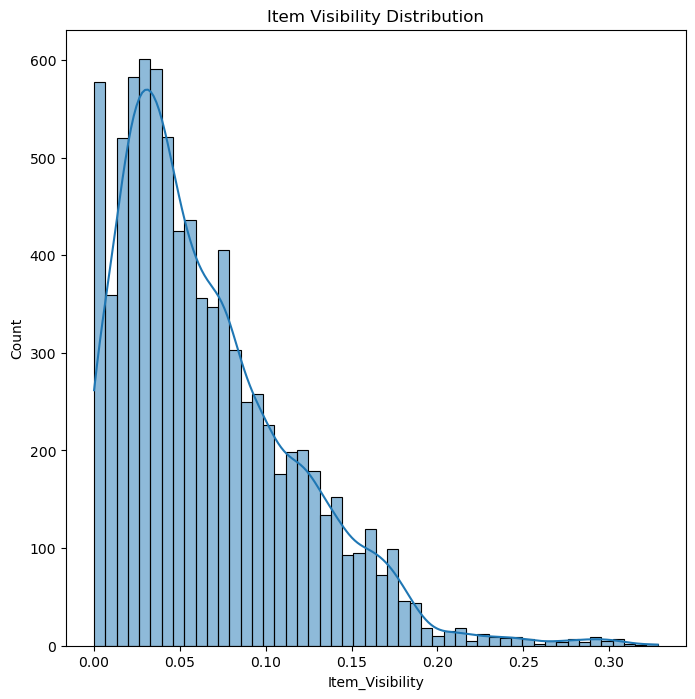

In [162]:
plt.figure(figsize=(8,8))
plt.title("Item Visibility Distribution")
sns.histplot(data=train, x='Item_Visibility', kde=True, alpha=0.5)
plt.show()
    

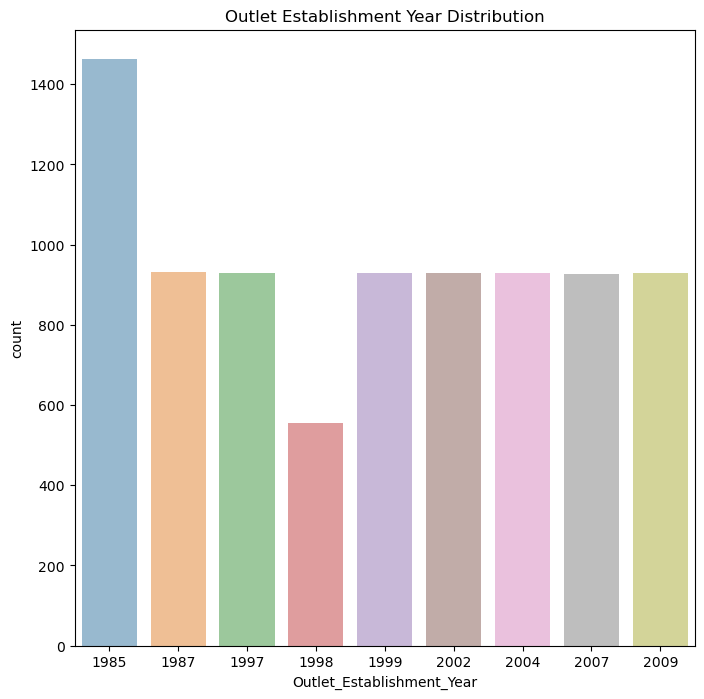

In [163]:
plt.figure(figsize=(8,8))
plt.title("Outlet Establishment Year Distribution")
sns.countplot(data=train, x='Outlet_Establishment_Year', alpha=0.5)
plt.show()

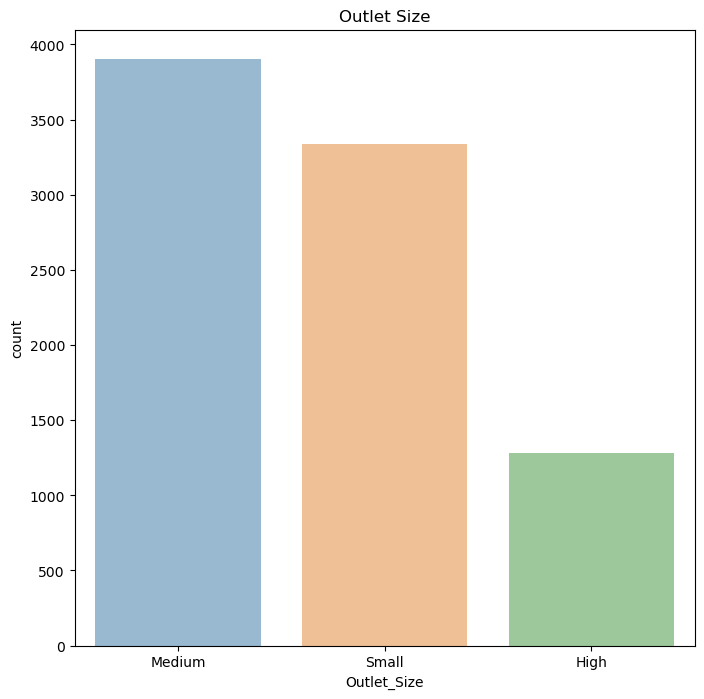

In [164]:
plt.figure(figsize=(8,8))
plt.title("Outlet Size")
sns.countplot(data=train, x='Outlet_Size', alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

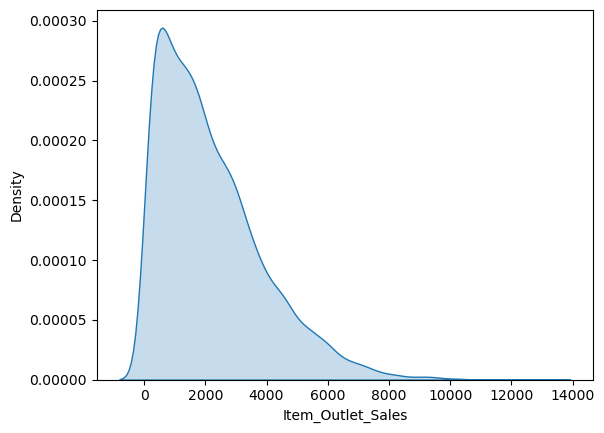

In [165]:
sns.kdeplot(data=train['Item_Outlet_Sales'], shade=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

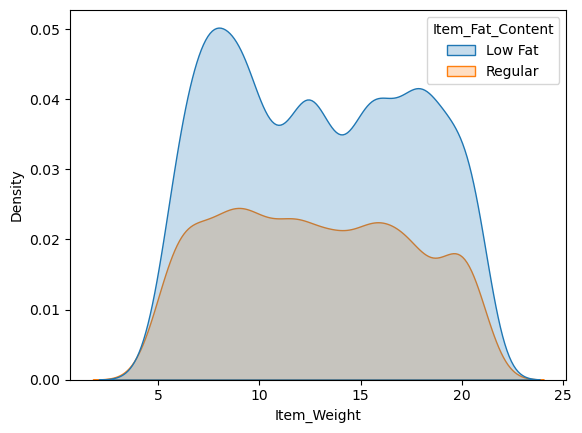

In [166]:
sns.kdeplot(data=train, x='Item_Weight', hue='Item_Fat_Content', shade=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

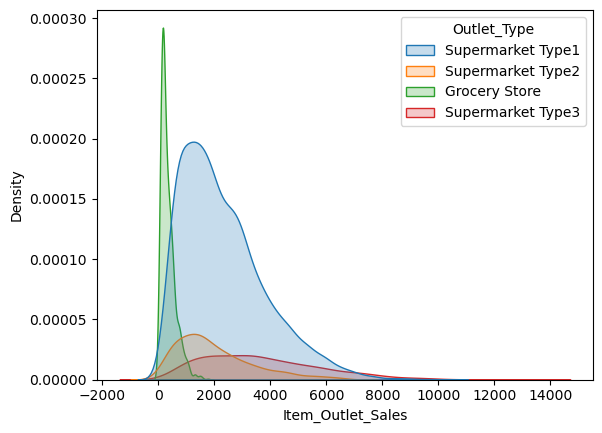

In [167]:
sns.kdeplot(data=train, x='Item_Outlet_Sales', hue='Outlet_Type', shade=True)

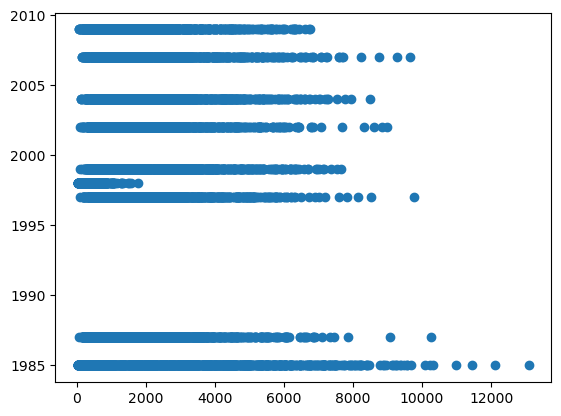

In [168]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(train['Item_Outlet_Sales'],train['Outlet_Establishment_Year'])
#Labels and Tit
plt.show()

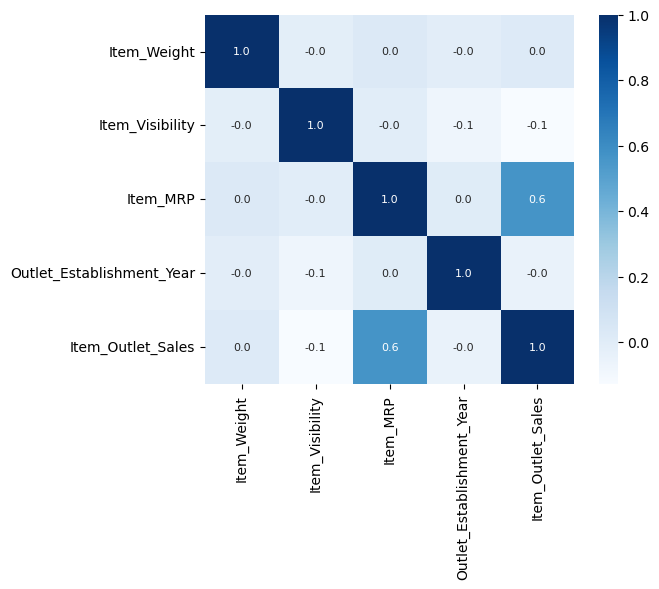

In [169]:
correlation =train.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

### Encoding ( label encoding)
### Remove Column that has no effect

In [170]:
obj_train = train.select_dtypes(include=['object']).copy()
obj_train.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [171]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] =train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [172]:
train.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [173]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,Food
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [174]:
for i in train.columns:
    if train[i].dtype=='object':
            label_encoder=LabelEncoder()
            train[i]=label_encoder.fit_transform(train[i])

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int32  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int32  
 6   Outlet_Location_Type  8523 non-null   int32  
 7   Outlet_Type           8523 non-null   int32  
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Item_Type_Combined    8523 non-null   int32  
dtypes: float64(4), int32(6)
memory usage: 466.2 KB


### Handling  outliers

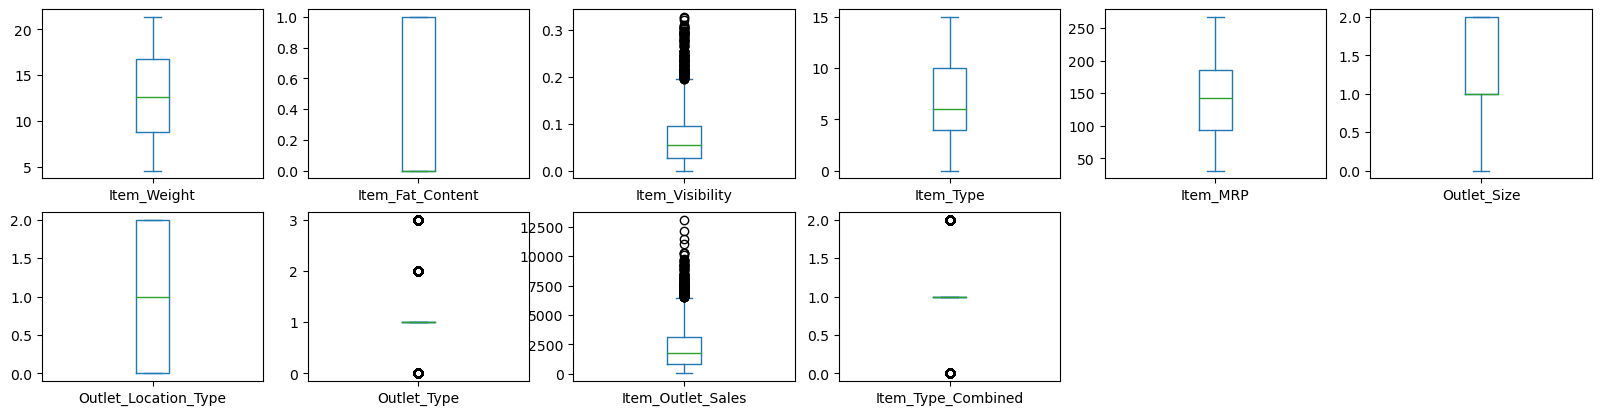

In [176]:
train.plot(kind="box",subplots=True,layout=(7,6),figsize=(20,18))
plt.show()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

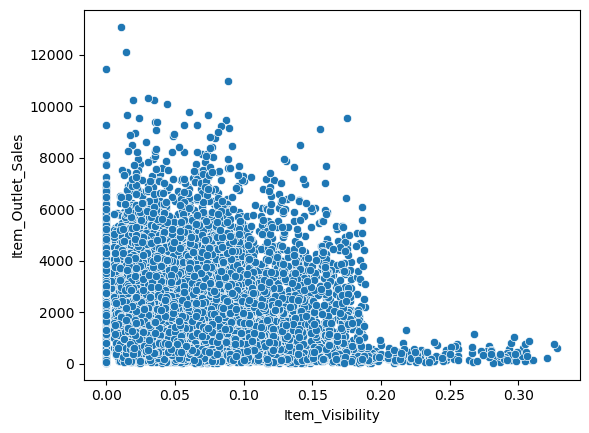

In [177]:
sns.scatterplot(x=train['Item_Visibility'],y=train['Item_Outlet_Sales'])

In [178]:
train=train[train['Item_Visibility']<0.30]

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

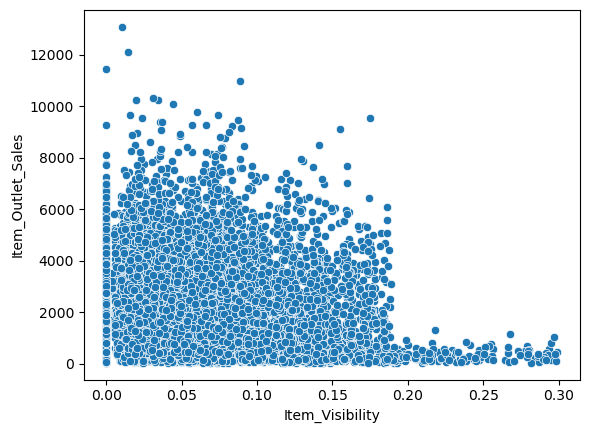

In [179]:
sns.scatterplot(x=train['Item_Visibility'],y=train['Item_Outlet_Sales'])

### Split data

In [180]:

Y = train['Item_Outlet_Sales']
X = train.drop(columns='Item_Outlet_Sales', axis=1)

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

### Scaling

In [182]:
# import Robust Scaler library
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
# fit the modeling features to the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(5957, 9)

### Modeling

In [183]:
# XGboost
model_xgb = XGBRegressor(learning_rate=0.3)

In [184]:
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [185]:

# prediction for test data
xgb_test_predictions = model_xgb.predict(X_test)


In [186]:
model_xgb.score(X_train, Y_train)

0.8645260347757822

In [187]:
model_xgb.score(X_test,Y_test)

0.5338566494101253

In [188]:
# Linear regression
model_linear = LinearRegression()

In [189]:
model_linear.fit(X_train, Y_train)

LinearRegression()

In [190]:
model_linear.predict(X_test)

array([2498.96633858, 2851.64883467, 1926.48826653, ..., 2758.0499715 ,
       2973.30005121, 5541.78053766])

In [191]:
model_linear.score(X_train, Y_train)

0.5032934480765594

In [192]:
model_linear.score(X_test,Y_test)

0.5051864529297346

In [193]:
# Random forest
forest_model = RandomForestRegressor(random_state=3)
forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=3)

In [194]:
forest_model.predict(X_test)

array([2583.776718, 3173.742098, 2478.194154, ..., 3153.987812,
       2806.606662, 7250.315654])

In [195]:
forest_model.score(X_train ,Y_train)

0.9365823399338654

In [196]:
forest_model.score(X_test ,Y_test)

0.5511533543487847

### Evaluation

In [197]:
# xgboost
# prediction for training data
xgb_training_predictions = model_xgb.predict(X_train)

# prediction for test data
xgb_test_predictions = model_xgb.predict(X_test)

In [198]:
#evaluation on training 
print(f"R2 Score: {round(r2_score(Y_train, xgb_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, xgb_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, xgb_training_predictions), 2)}")

R2 Score: 0.86
MSE: 397786.97
MAE: 458.26


In [199]:
#evaluation on test
print(f"R2 Score: {round(r2_score(Y_test, xgb_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, xgb_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, xgb_test_predictions), 2)}")

R2 Score: 0.53
MSE: 1328420.4
MAE: 805.58


In [200]:
#Random forest
# prediction for training data
random_forest_training_predictions = forest_model.predict(X_train)

# prediction for test data
random_forest_test_predictions = forest_model.predict(X_test)

In [201]:
#evaluation on training 
print(f"R2 Score: {round(r2_score(Y_train, random_forest_training_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_train, random_forest_training_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_train, random_forest_training_predictions), 2)}")

R2 Score: 0.94
MSE: 186210.83
MAE: 301.59


In [202]:
print(f"R2 Score: {round(r2_score(Y_test, random_forest_test_predictions), 2)}")
print(f"MSE: {round(mean_squared_error(Y_test, random_forest_test_predictions), 2)}")
print(f"MAE: {round(mean_absolute_error(Y_test, random_forest_test_predictions), 2)}")

R2 Score: 0.55
MSE: 1279128.06
MAE: 785.15
